<a href="https://colab.research.google.com/github/RohanMathur17/Bank-Note-Authentication/blob/main/src/bank_note_authentication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

import numpy as np
from numpy import array
from numpy import argmax


import tensorflow as tf
from tensorflow import keras
from keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam , SGD , RMSprop

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/content/drive/MyDrive/HappyMonk/BankNote_Authentication.csv')

In [4]:
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [5]:
df.shape

(1372, 5)

In [6]:
df['class'].value_counts()

0    762
1    610
Name: class, dtype: int64

In [7]:
df.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [8]:
df.columns.isnull()

array([False, False, False, False, False])

## **Using different activation functions**

### **On Raw Data**

1) **Using Sigmoid Function**

In [9]:
X= df.drop(['class'], axis=1)
y= df['class']

In [10]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1367    1
1368    1
1369    1
1370    1
1371    1
Name: class, Length: 1372, dtype: int64

In [11]:
x_train, x_test, y_train, y_test = train_test_split(X , y , test_size = 0.2, random_state = 42)

In [12]:
model_1 = tf.keras.models.Sequential([                    
        tf.keras.layers.Dense(4,activation='relu'),
        tf.keras.layers.Dense(1,activation='sigmoid')
])

In [13]:
model_1.compile(optimizer='adam' , 
                loss=tf.keras.losses.binary_crossentropy , 
                metrics=['accuracy'])

In [14]:
y_train.shape

(1097,)

In [15]:
history_1 = model_1.fit(x_train, y_train, epochs=20 , validation_data=(x_test, y_test))

Epoch 1/20
35/35 [==============================] - 1s 16ms/step - loss: 0.6686 - accuracy: 0.6698 - val_loss: 0.6303 - val_accuracy: 0.7055
Epoch 2/20
35/35 [==============================] - 0s 3ms/step - loss: 0.6295 - accuracy: 0.6953 - val_loss: 0.5888 - val_accuracy: 0.7273
Epoch 3/20
35/35 [==============================] - 0s 2ms/step - loss: 0.5777 - accuracy: 0.7429 - val_loss: 0.5502 - val_accuracy: 0.7418
Epoch 4/20
35/35 [==============================] - 0s 3ms/step - loss: 0.5173 - accuracy: 0.7835 - val_loss: 0.5092 - val_accuracy: 0.7636
Epoch 5/20
35/35 [==============================] - 0s 3ms/step - loss: 0.4997 - accuracy: 0.7825 - val_loss: 0.4659 - val_accuracy: 0.8109
Epoch 6/20
35/35 [==============================] - 0s 3ms/step - loss: 0.4630 - accuracy: 0.8124 - val_loss: 0.4241 - val_accuracy: 0.8473
Epoch 7/20
35/35 [==============================] - 0s 3ms/step - loss: 0.4185 - accuracy: 0.8686 - val_loss: 0.3815 - val_accuracy: 0.9018
Epoch 8/20
35/35 [=

In [16]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 20        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5         
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


In [17]:
print(history_1.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


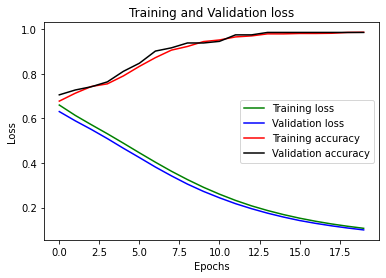

In [56]:
loss_train = history_1.history['loss']
loss_val = history_1.history['val_loss']

acc_train = history_1.history['accuracy']
acc_val = history_1.history['val_accuracy']


epochs = range(0,20)

plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='Validation loss')


plt.plot(epochs, acc_train, 'red', label='Training accuracy')
plt.plot(epochs, acc_val, 'black', label='Validation accuracy')


plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [20]:
yhat_classes = model_1.predict_classes(x_test, verbose=0)

yhat_classes = yhat_classes[:, 0]
 
accuracy_1 = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy_1)

precision_1 = precision_score(y_test, yhat_classes)
print('Precision: %f' % precision_1)

recall_1 = recall_score(y_test, yhat_classes)
print('Recall: %f' % recall_1)

f1_1 = f1_score(y_test, yhat_classes)
print('F1 score: %f' % f1_1)

Accuracy: 0.985455
Precision: 0.984252
Recall: 0.984252
F1 score: 0.984252


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


## **After Scaling Data**

In [21]:
scaler = StandardScaler()
scaler.fit(X)

bank_note_data_normalized = scaler.transform(X)

standardized_X = pd.DataFrame(data = X, index= X.index, columns= X.columns)

In [22]:
standardized_X.describe()

,variance,skewness,curtosis,entropy
count,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657
std,2.842763,5.869047,4.310030,2.101013
min,-7.042100,-13.773100,-5.286100,-8.548200
25%,-1.773000,-1.708200,-1.574975,-2.413450
50%,0.496180,2.319650,0.616630,-0.586650
75%,2.821475,6.814625,3.179250,0.394810
max,6.824800,12.951600,17.927400,2.449500


In [23]:
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(standardized_X , y , test_size = 0.2, random_state = 42)

In [24]:
x_train_2.shape , y_test_2.shape

((1097, 4), (275,))

In [25]:
model_2 = tf.keras.models.Sequential([                    
        tf.keras.layers.Dense(4,activation='relu'),
        tf.keras.layers.Dense(1,activation='sigmoid')
])

In [26]:
model_2.compile(optimizer = 'adam', 
                loss = tf.keras.losses.binary_crossentropy, 
                metrics = ['accuracy'])

In [27]:
history_2 = model_2.fit(x_train_2 , y_train_2 , epochs = 20 , validation_data=(x_test_2, y_test_2))

Epoch 1/20
35/35 [==============================] - 1s 8ms/step - loss: 1.0550 - accuracy: 0.5360 - val_loss: 1.0503 - val_accuracy: 0.5455
Epoch 2/20
35/35 [==============================] - 0s 2ms/step - loss: 0.9160 - accuracy: 0.5447 - val_loss: 0.9004 - val_accuracy: 0.5782
Epoch 3/20
35/35 [==============================] - 0s 3ms/step - loss: 0.8282 - accuracy: 0.5921 - val_loss: 0.7763 - val_accuracy: 0.6473
Epoch 4/20
35/35 [==============================] - 0s 3ms/step - loss: 0.7254 - accuracy: 0.6495 - val_loss: 0.6707 - val_accuracy: 0.6764
Epoch 5/20
35/35 [==============================] - 0s 3ms/step - loss: 0.6318 - accuracy: 0.6841 - val_loss: 0.5804 - val_accuracy: 0.7236
Epoch 6/20
35/35 [==============================] - 0s 3ms/step - loss: 0.5411 - accuracy: 0.7379 - val_loss: 0.5055 - val_accuracy: 0.7745
Epoch 7/20
35/35 [==============================] - 0s 3ms/step - loss: 0.4849 - accuracy: 0.7680 - val_loss: 0.4444 - val_accuracy: 0.8109
Epoch 8/20
35/35 [==

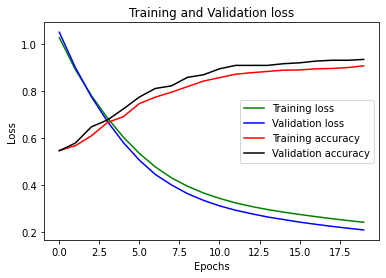

In [57]:
loss_train = history_2.history['loss']
loss_val = history_2.history['val_loss']

acc_train = history_2.history['accuracy']
acc_val = history_2.history['val_accuracy']


epochs = range(0,20)

plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='Validation loss')


plt.plot(epochs, acc_train, 'red', label='Training accuracy')
plt.plot(epochs, acc_val, 'black', label='Validation accuracy')


plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [30]:
yhat_probs = model_2.predict(x_test_2, verbose=0)

yhat_classes = model_2.predict_classes(x_test_2, verbose=0)

yhat_classes = yhat_classes[:, 0]
 
accuracy_2 = accuracy_score(y_test_2, yhat_classes)
print('Accuracy: %f' % accuracy_2)

precision_2 = precision_score(y_test_2, yhat_classes)
print('Precision: %f' % precision_2)

recall_2 = recall_score(y_test_2, yhat_classes)
print('Recall: %f' % recall_2)

f1_2 = f1_score(y_test_2, yhat_classes)
print('F1 score: %f' % f1_2)

Accuracy: 0.934545
Precision: 0.881119
Recall: 0.992126
F1 score: 0.933333


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


### 2) **Using softmax**

In [31]:
data = array(y)

encoded_y = to_categorical(data)
print(encoded_y)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [32]:
x_train_3, x_test_3, y_train_3, y_test_3 = train_test_split(standardized_X , encoded_y , test_size=0.2 , random_state = 42)

In [33]:
x_train_3.shape , y_test_3.shape

((1097, 4), (275, 2))

In [34]:
model_3 = tf.keras.models.Sequential([                    
        tf.keras.layers.Dense(4 , activation = 'relu'),
        tf.keras.layers.Dense(2 , activation = 'softmax')
])

In [35]:
model_3.compile(optimizer = 'adam',
                loss = tf.keras.losses.categorical_crossentropy,
                metrics = ['accuracy'])

In [36]:
history_3 = model_3.fit(x_train_3 , y_train_3 , epochs=20 , validation_data = (x_test_3, y_test_3))

Epoch 1/20
35/35 [==============================] - 1s 7ms/step - loss: 1.8102 - accuracy: 0.5605 - val_loss: 1.2867 - val_accuracy: 0.7273
Epoch 2/20
35/35 [==============================] - 0s 2ms/step - loss: 1.4037 - accuracy: 0.6738 - val_loss: 0.9459 - val_accuracy: 0.7455
Epoch 3/20
35/35 [==============================] - 0s 2ms/step - loss: 0.9080 - accuracy: 0.7302 - val_loss: 0.6253 - val_accuracy: 0.7673
Epoch 4/20
35/35 [==============================] - 0s 3ms/step - loss: 0.5771 - accuracy: 0.7933 - val_loss: 0.5023 - val_accuracy: 0.8691
Epoch 5/20
35/35 [==============================] - 0s 3ms/step - loss: 0.4843 - accuracy: 0.8738 - val_loss: 0.4699 - val_accuracy: 0.8727
Epoch 6/20
35/35 [==============================] - 0s 3ms/step - loss: 0.4418 - accuracy: 0.9139 - val_loss: 0.4473 - val_accuracy: 0.8800
Epoch 7/20
35/35 [==============================] - 0s 3ms/step - loss: 0.4252 - accuracy: 0.9019 - val_loss: 0.4281 - val_accuracy: 0.8800
Epoch 8/20
35/35 [==

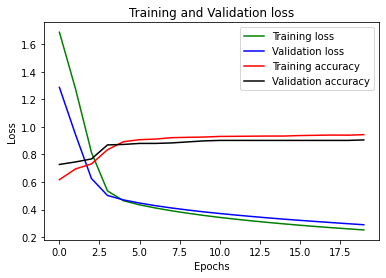

In [58]:
loss_train = history_3.history['loss']
loss_val = history_3.history['val_loss']

acc_train = history_3.history['accuracy']
acc_val = history_3.history['val_accuracy']


epochs = range(0,20)

plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='Validation loss')


plt.plot(epochs, acc_train, 'red', label='Training accuracy')
plt.plot(epochs, acc_val, 'black', label='Validation accuracy')


plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [39]:
y_test_classes_3 = np.argmax(y_test_3, axis = 1)

yhat_classes_3 = model_3.predict_classes(x_test_3, verbose = 0)
yhat_classes_3 =  np.reshape(yhat_classes_3, (-1, 1))

yhat_classes_3 = yhat_classes_3[:, 0]
 

accuracy_3 = accuracy_score(y_test_classes_3, yhat_classes_3)
print('Accuracy: %f' % accuracy_3)

precision_3 = precision_score(y_test_classes_3, yhat_classes_3)
print('Precision: %f' % precision_3)

recall_3 = recall_score(y_test_classes_3, yhat_classes_3)
print('Recall: %f' % recall_3)

f1_3 = f1_score(y_test_classes_3, yhat_classes_3)
print('F1 score: %f' % f1_3)

Accuracy: 0.905455
Precision: 0.963303
Recall: 0.826772
F1 score: 0.889831


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


## Using RMSProp as the optimizer

In [40]:
x_train_4, x_test_4, y_train_4, y_test_4 = train_test_split(standardized_X, encoded_y, test_size = 0.2, random_state = 42)

In [41]:
model_4 = tf.keras.models.Sequential([                    
        tf.keras.layers.Dense(4,activation = 'relu'),
        tf.keras.layers.Dense(2,activation = 'softmax')
])

In [42]:
model_4.compile(optimizer = 'rmsprop', 
                loss = tf.keras.losses.categorical_crossentropy, 
                metrics = ['accuracy'])

In [43]:
history_4 = model_4.fit(x_train_4 ,  y_train_4 , epochs = 20 , validation_data = (x_test_4, y_test_4))

Epoch 1/20
35/35 [==============================] - 1s 7ms/step - loss: 0.7701 - accuracy: 0.4832 - val_loss: 0.6938 - val_accuracy: 0.5600
Epoch 2/20
35/35 [==============================] - 0s 3ms/step - loss: 0.6573 - accuracy: 0.5942 - val_loss: 0.6421 - val_accuracy: 0.6036
Epoch 3/20
35/35 [==============================] - 0s 3ms/step - loss: 0.6111 - accuracy: 0.6290 - val_loss: 0.5971 - val_accuracy: 0.6545
Epoch 4/20
35/35 [==============================] - 0s 3ms/step - loss: 0.5747 - accuracy: 0.6664 - val_loss: 0.5546 - val_accuracy: 0.7018
Epoch 5/20
35/35 [==============================] - 0s 3ms/step - loss: 0.5337 - accuracy: 0.7149 - val_loss: 0.5159 - val_accuracy: 0.7200
Epoch 6/20
35/35 [==============================] - 0s 3ms/step - loss: 0.4657 - accuracy: 0.7958 - val_loss: 0.4706 - val_accuracy: 0.7673
Epoch 7/20
35/35 [==============================] - 0s 3ms/step - loss: 0.4499 - accuracy: 0.8185 - val_loss: 0.4326 - val_accuracy: 0.7818
Epoch 8/20
35/35 [==

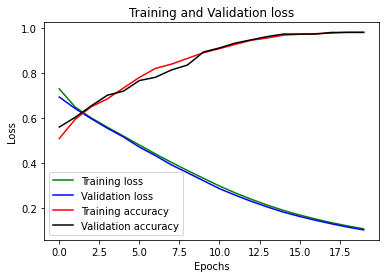

In [59]:
loss_train = history_4.history['loss']
loss_val = history_4.history['val_loss']

acc_train = history_4.history['accuracy']
acc_val = history_4.history['val_accuracy']


epochs = range(0,20)

plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='Validation loss')


plt.plot(epochs, acc_train, 'red', label='Training accuracy')
plt.plot(epochs, acc_val, 'black', label='Validation accuracy')


plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [46]:
x_test_4

,variance,skewness,curtosis,entropy
430,1.569100,6.346500,-0.1828,-2.40990
588,-0.278020,8.188100,-3.1338,-2.52760
296,0.051979,7.052100,-2.0541,-3.15080
184,-1.755900,11.945900,3.0946,-4.89780
244,2.428700,9.382100,-3.2477,-1.45430
...,...,...,...,...
1341,-2.262500,-0.099335,2.8127,0.48662
1100,1.437800,0.668370,-2.0267,1.02710
620,3.462600,-4.449000,3.5427,0.15429
617,-0.278000,8.188100,-3.1338,-2.52760


In [47]:
y_test_classes_4 = np.argmax(y_test_4, axis=1)

yhat_classes_4 = model_4.predict_classes(x_test_4, verbose = 0)
yhat_classes_4 =  np.reshape(yhat_classes_4, (-1, 1))

yhat_classes_4 = yhat_classes_4[:, 0]
 

accuracy_4 = accuracy_score(y_test_classes_4, yhat_classes_4)
print('Accuracy: %f' % accuracy_4)

precision_4 = precision_score(y_test_classes_4, yhat_classes_4)
print('Precision: %f' % precision_4)

recall_4 = recall_score(y_test_classes_4, yhat_classes_4)
print('Recall: %f' % recall_4)

f1_4 = f1_score(y_test_classes_4, yhat_classes_4)
print('F1 score: %f' % f1_4)

Accuracy: 0.981818
Precision: 0.969231
Recall: 0.992126
F1 score: 0.980545


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


### Using SGD as Optimizer

In [48]:
x_train_5, x_test_5, y_train_5, y_test_5 = train_test_split(standardized_X, encoded_y, test_size = 0.2, random_state = 42)

In [49]:
model_5 = tf.keras.models.Sequential([                    
        tf.keras.layers.Dense(4,activation = 'relu'),
        tf.keras.layers.Dense(2,activation = 'softmax')
])

In [50]:
model_5.compile(optimizer = 'SGD', 
                loss = tf.keras.losses.categorical_crossentropy,
                metrics = ['accuracy'])

In [51]:
history_5 = model_5.fit(x_train_5 , y_train_5, epochs = 20 , validation_data = (x_test_5, y_test_5))

Epoch 1/20
35/35 [==============================] - 1s 8ms/step - loss: 2.1382 - accuracy: 0.2531 - val_loss: 1.1218 - val_accuracy: 0.4582
Epoch 2/20
35/35 [==============================] - 0s 3ms/step - loss: 0.9745 - accuracy: 0.4766 - val_loss: 0.7199 - val_accuracy: 0.6109
Epoch 3/20
35/35 [==============================] - 0s 2ms/step - loss: 0.6662 - accuracy: 0.6181 - val_loss: 0.5345 - val_accuracy: 0.7491
Epoch 4/20
35/35 [==============================] - 0s 3ms/step - loss: 0.4816 - accuracy: 0.7741 - val_loss: 0.3923 - val_accuracy: 0.9345
Epoch 5/20
35/35 [==============================] - 0s 2ms/step - loss: 0.3626 - accuracy: 0.9501 - val_loss: 0.2918 - val_accuracy: 0.9855
Epoch 6/20
35/35 [==============================] - 0s 3ms/step - loss: 0.2761 - accuracy: 0.9756 - val_loss: 0.2184 - val_accuracy: 0.9891
Epoch 7/20
35/35 [==============================] - 0s 2ms/step - loss: 0.2040 - accuracy: 0.9835 - val_loss: 0.1725 - val_accuracy: 0.9927
Epoch 8/20
35/35 [==

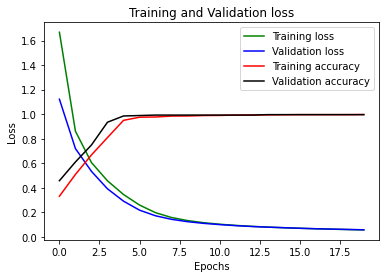

In [60]:
loss_train = history_5.history['loss']
loss_val = history_5.history['val_loss']

acc_train = history_5.history['accuracy']
acc_val = history_5.history['val_accuracy']


epochs = range(0,20)

plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='Validation loss')


plt.plot(epochs, acc_train, 'red', label='Training accuracy')
plt.plot(epochs, acc_val, 'black', label='Validation accuracy')


plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [54]:
y_test_classes_5 = np.argmax(y_test_5, axis=1)

yhat_classes_5 = model_5.predict_classes(x_test_5, verbose = 0)
yhat_classes_5 =  np.reshape(yhat_classes_5, (-1, 1))

yhat_classes_5 = yhat_classes_5[:, 0]
 

accuracy_5 = accuracy_score(y_test_classes_5, yhat_classes_5)
print('Accuracy: %f' % accuracy_5)

precision_5 = precision_score(y_test_classes_5, yhat_classes_5)
print('Precision: %f' % precision_5)

recall_5 = recall_score(y_test_classes_5, yhat_classes_5)
print('Recall: %f' % recall_5)

f1_5 = f1_score(y_test_classes_5, yhat_classes_5)
print('F1 score: %f' % f1_5)

Accuracy: 0.996364
Precision: 0.992188
Recall: 1.000000
F1 score: 0.996078


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
